# Time Series Analysis in R

#### **Data** : UK Outward Passengers Movement

Here we will try to build a forcast model for outward movement of UK passengers to the rest of the world. The data is quarterly from 1996 till 2005. We will try to forcast for the year 2006. The value mentioned are in Thousands

*Source: Department for Transport; Monthly Digest of Statistics*

First we load the reqired libraries

In [22]:
library(data.table)
library(forecast)
library(tseries)
options (repr.plot.width = 7, repr.plot.height = 5)

Importing the file and converting it into a time series

setwd("C:/Users/Niranjan/Documents/Case studies/Time Series/")

In [9]:
uk_passengers <- fread("UK Outward Passengers Movement.csv")

uk_ts_total <- ts(uk_passengers$Total,start = c(1996,1),end = c(2005,4),frequency = 4)

In [10]:
uk_ts_total

      Qtr1  Qtr2  Qtr3  Qtr4
1996 10222 13549 16632 11983
1997 11007 14871 18108 12977
1998 11796 16378 19966 14154
1999 13031 17281 21118 14897
2000 13525 18876 22726 15952
2001 14044 17870 22812 14669
2002 14223 18751 23223 16716
2003 14693 19754 24362 17943
2004 16083 21654 26113 19171
2005 17915 22971 27624 20127

Now the Data is in time series format

First the series is decomposed and analysed

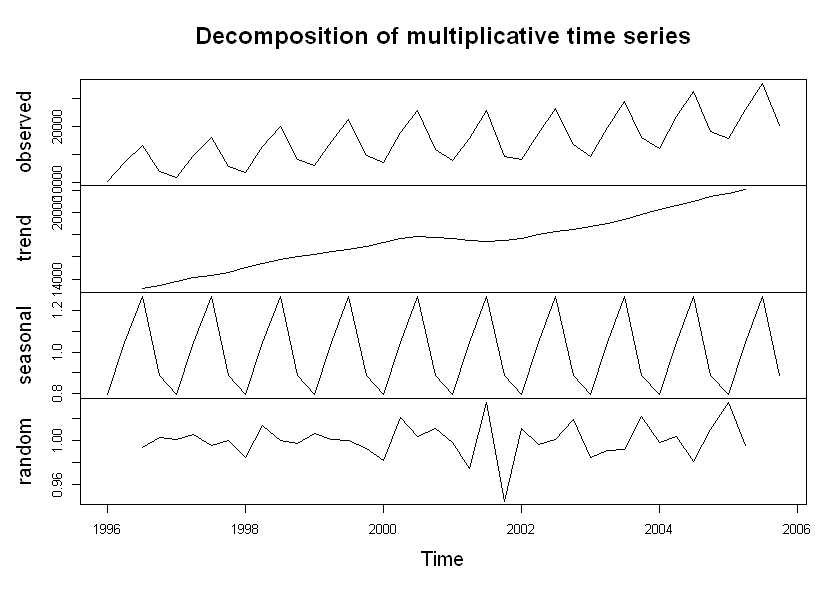

In [23]:
fit<-decompose(uk_ts_total, type = c("multiplicative"))
plot(fit)

The following things can be observed from the above plots
- The plot shows that there is an obious spike in outward movements that are seasonal. 
- The trendline shows a gradual increase in the outward movement of people
- It is also seen that there is a great change in the irregularities in the year 2001

The seasonality is affected by the seasonal index

In [15]:
fit$seasonal

          Qtr1      Qtr2      Qtr3      Qtr4
1996 0.7963359 1.0473972 1.2688280 0.8874389
1997 0.7963359 1.0473972 1.2688280 0.8874389
1998 0.7963359 1.0473972 1.2688280 0.8874389
1999 0.7963359 1.0473972 1.2688280 0.8874389
2000 0.7963359 1.0473972 1.2688280 0.8874389
2001 0.7963359 1.0473972 1.2688280 0.8874389
2002 0.7963359 1.0473972 1.2688280 0.8874389
2003 0.7963359 1.0473972 1.2688280 0.8874389
2004 0.7963359 1.0473972 1.2688280 0.8874389
2005 0.7963359 1.0473972 1.2688280 0.8874389

Inorder to do an ARIMA analysis the plot is examined for stationarity

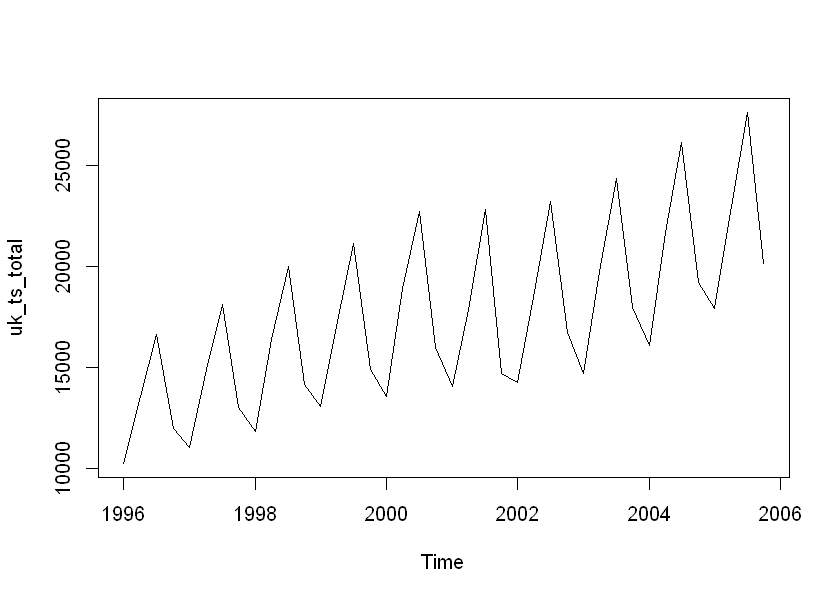

In [24]:
plot(uk_ts_total)

The above plot shows the series, but it is not stationary as the mean and variance does not remain to be same throughout. Top deal with that, a transformation is done

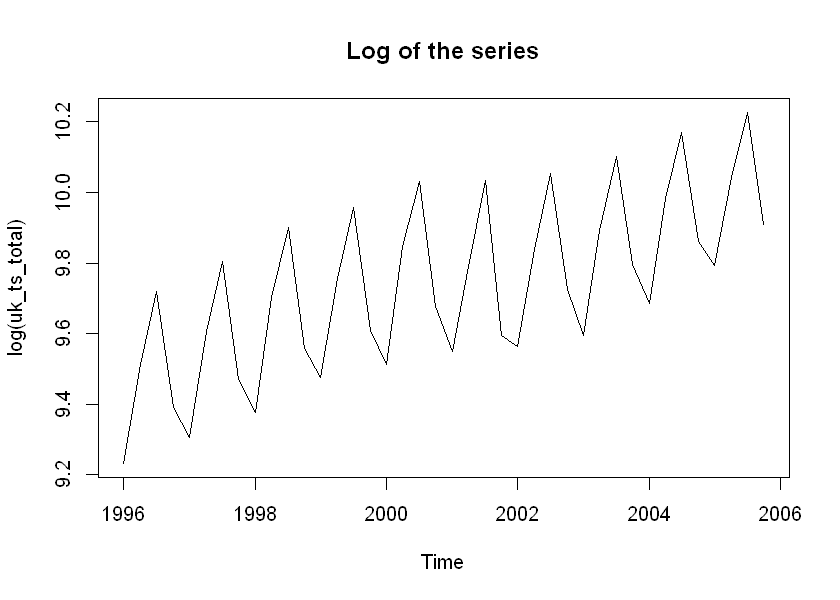

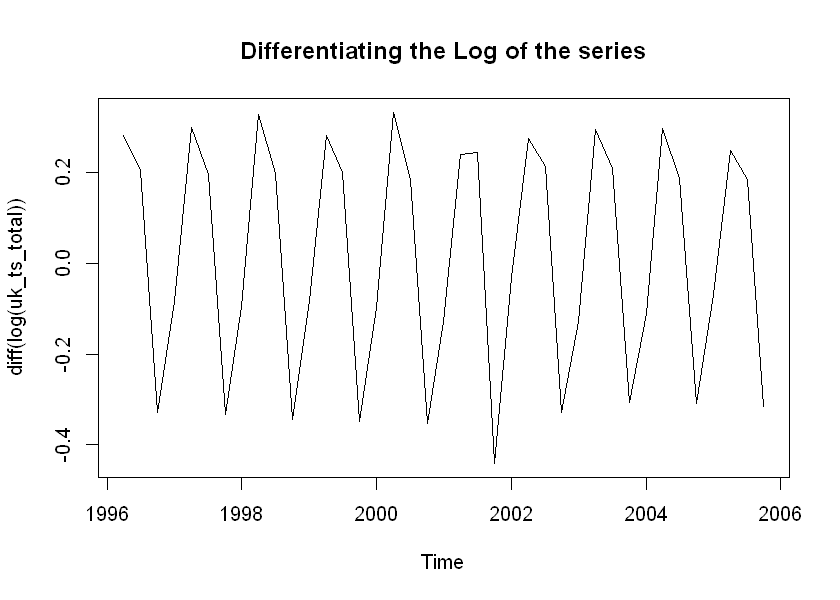

In [27]:
plot(log(uk_ts_total),main = "Log of the series")
plot(diff(log(uk_ts_total)),main = "Differentiating the Log of the series")

Now the series looks stationary. An ADF test is conducted to verify this.

In [28]:
adf.test(diff(log(uk_ts_total)))


	Augmented Dickey-Fuller Test

data:  diff(log(uk_ts_total))
Dickey-Fuller = -3.3776, Lag order = 3, p-value = 0.07511
alternative hypothesis: stationary


The p-value is still higher than 0.05 so another differentiation is done

Warning message in adf.test(diff(diff(log(uk_ts_total)))):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(diff(log(uk_ts_total)))
Dickey-Fuller = -9.4843, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


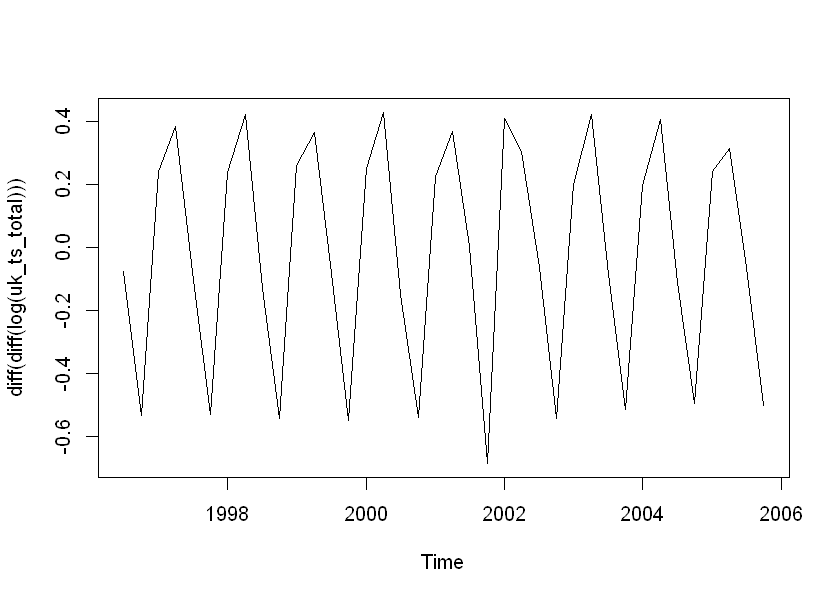

In [29]:
plot(diff(diff(log(uk_ts_total))))
adf.test(diff(diff(log(uk_ts_total))))

L_uk_ts_total <- (diff(diff(log(uk_ts_total))))

Now the series is stationary.

For ARIMA, the p and q values need to be identified, this is done using the ACF and PACF charts

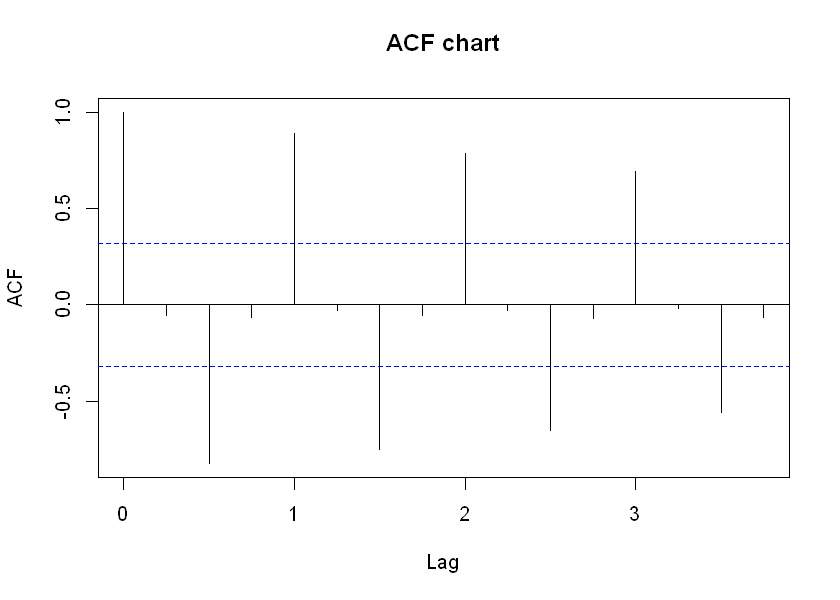

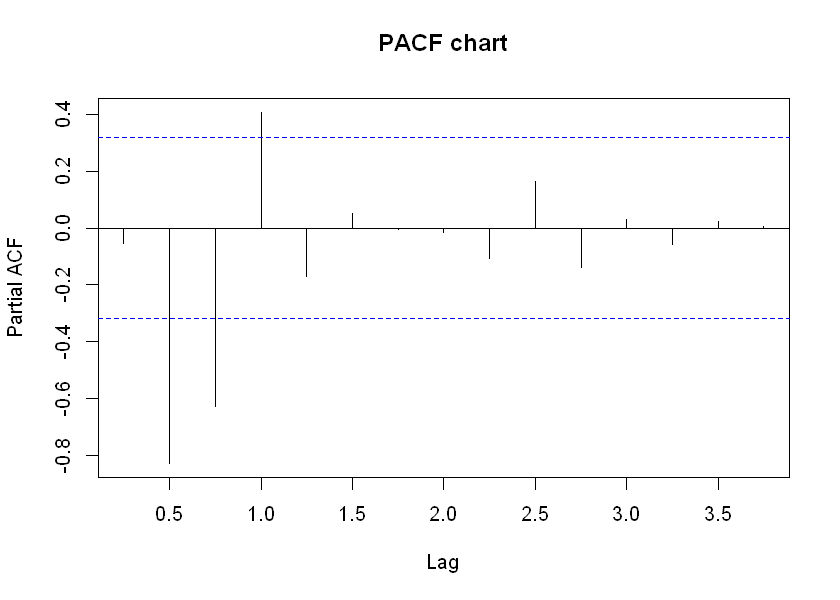

In [34]:
acf(L_uk_ts_total, main = "ACF chart")
pacf(L_uk_ts_total, main = "PACF chart")

A model is fitted with the values interpretted from the acf and pacf graphs

In [35]:
fit2 <- arima(log(uk_ts_total),c(0,2,1))
summary(fit2)


Call:
arima(x = log(uk_ts_total), order = c(0, 2, 1))

Coefficients:
          ma1
      -1.0000
s.e.   0.0682

sigma^2 estimated as 0.06582:  log likelihood = -4.06,  aic = 12.11

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE     MASE
Training set -0.02761364 0.2500685 0.2188737 -0.3160594 2.246721 0.933388
                    ACF1
Training set -0.01687601


A model is also built with the auto.arima function

In [36]:
model <- auto.arima(log(uk_ts_total),approximation = F, trace = F)
summary(model)

Series: log(uk_ts_total) 
ARIMA(2,0,0)(1,1,0)[4] with drift 

Coefficients:
         ar1     ar2     sar1   drift
      0.3521  0.4321  -0.4843  0.0150
s.e.  0.1478  0.1524   0.1423  0.0036

sigma^2 estimated as 0.001051:  log likelihood=73.94
AIC=-137.89   AICc=-135.89   BIC=-129.97

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0001160542 0.02900312 0.01997388 0.001787259 0.2049996 0.3005881
                   ACF1
Training set 0.07417935


The model given by Auto Arima has a very low AIC. The model is also a strong predictor because it has very low MAPE, RMSE and other error measures. Thus, the auto arima model is used to predict the future values

#### Forcasting

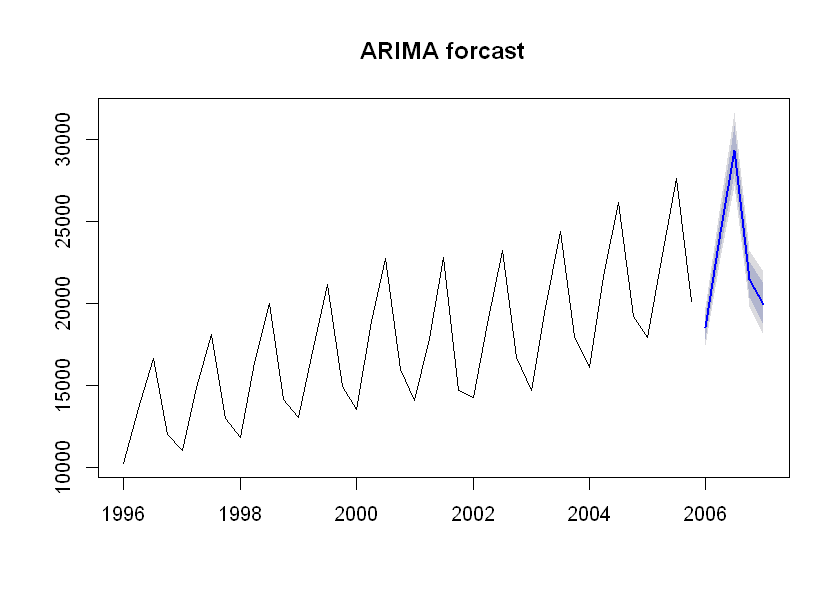

In [37]:
forc <- forecast(model,h=5)
forc$mean <- exp(forc$mean)
forc$lower <- exp(forc$lower)
forc$upper <- exp(forc$upper)
forc$x <- exp(forc$x)

plot(forc,main = "ARIMA forcast")